### Tugas
Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [1]:
# Mengimpor pustaka dan modul yang akan digunakan dalam tugas.
import pandas as pd
# Mengimpor pustaka pandas dengan alias pd.

import numpy as np
# Mengimpor pustaka numpy dengan alias np.

import matplotlib.pyplot as plt
# Mengimpor modul matplotlib.pyplot dengan alias plt.

from sklearn.cluster import KMeans
# Mengimpor modul KMeans dari pustaka scikit-learn.

from minisom import MiniSom
# Mengimpor modul MiniSom dari pustaka minisom.

from sklearn import datasets
# Mengimpor modul datasets dari pustaka scikit-learn.

In [2]:
# Membaca data dari file CSV "Mall_Customers.csv" yang terletak di direktori "../data".
df = pd.read_csv('../data/Mall_Customers.csv')

# Menampilkan lima baris pertama dari data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

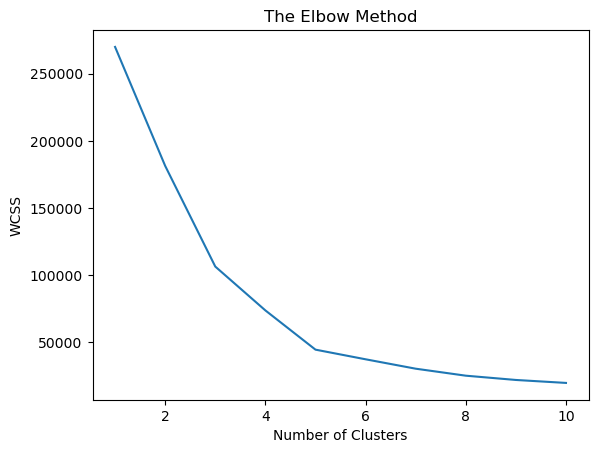

In [3]:
# Mengambil fitur "Annual Income" (Pendapatan Tahunan) dari data.
data = df.iloc[:, [3, 4]].values

# Mengimpor modul KMeans dari scikit-learn.
from sklearn.cluster import KMeans

# Membuat sebuah list kosong untuk menyimpan within-cluster sum of squares (WCSS).
wcss = []

# Melakukan iterasi untuk mencoba berbagai jumlah cluster (1 hingga 10).
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    
    # Menghitung dan menyimpan nilai WCSS (inertia_) untuk tiap jumlah cluster.
    wcss.append(kmeans.inertia_)

# Membuat plot untuk metode Elbow (elbow method) yang menunjukkan perubahan WCSS dengan jumlah cluster.
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


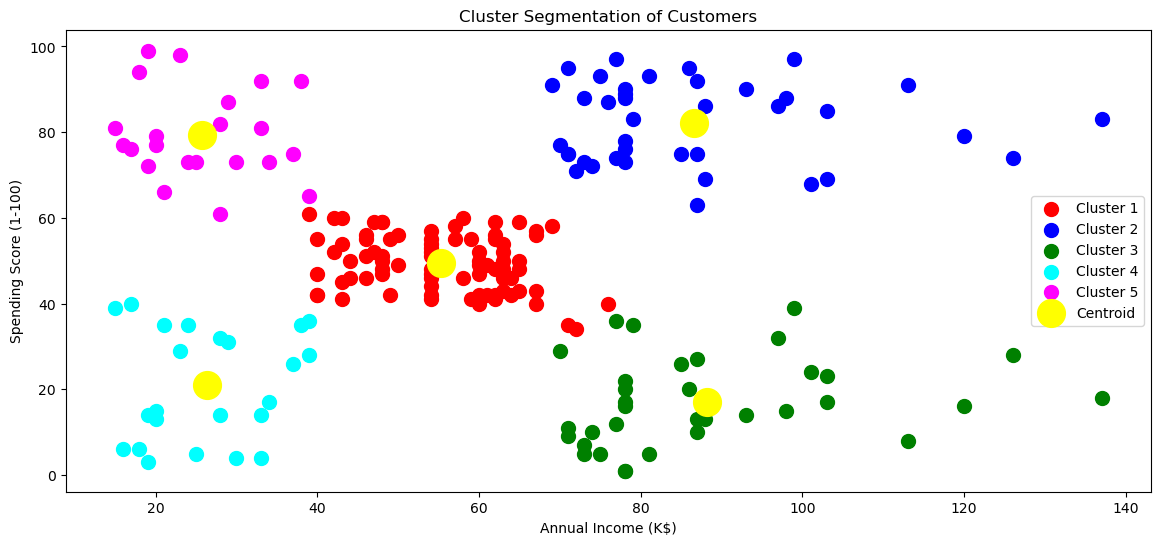

In [4]:
# Inisialisasi model K-Means dengan 5 cluster, dan menggunakan metode inisialisasi 'k-means++'.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Melakukan prediksi klaster untuk setiap data.
y_kmeans = kmeans.fit_predict(data)

# Membuat plot untuk visualisasi hasil klaster.
fig, ax = plt.subplots(figsize=(14, 6))

# Menampilkan data yang termasuk dalam tiap klaster dengan warna yang berbeda.
ax.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
ax.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
ax.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
ax.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Menampilkan titik-titik centroid klaster dengan warna kuning.
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='yellow', label='Centroid')

# Mengatur judul dan label sumbu pada plot.
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')

# Menampilkan legenda pada plot.
plt.legend()

# Menampilkan plot.
plt.show()

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

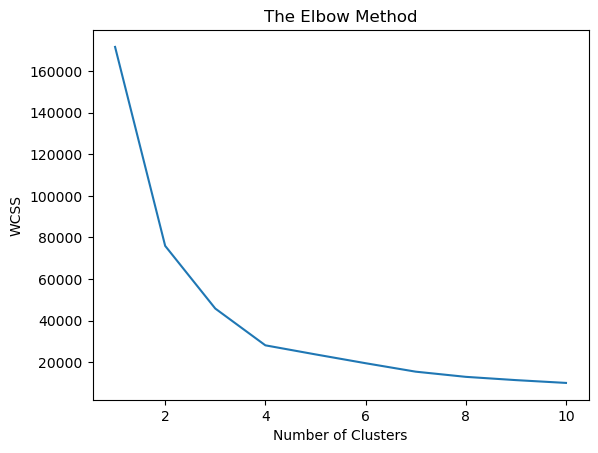

In [5]:
# Mengambil fitur "Annual Income" (Pendapatan Tahunan) dan "Spending Score" dari data.
data = df.iloc[:, [2, 4]].values

# Mengimpor modul KMeans dari scikit-learn.
from sklearn.cluster import KMeans

# Membuat sebuah list kosong untuk menyimpan within-cluster sum of squares (WCSS).
wcss = []

# Melakukan iterasi untuk mencoba berbagai jumlah klaster (1 hingga 10).
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    
    # Menghitung dan menyimpan nilai WCSS (inertia_) untuk tiap jumlah klaster.
    wcss.append(kmeans.inertia_)

# Membuat plot untuk metode Elbow (elbow method) yang menunjukkan perubahan WCSS dengan jumlah klaster.
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


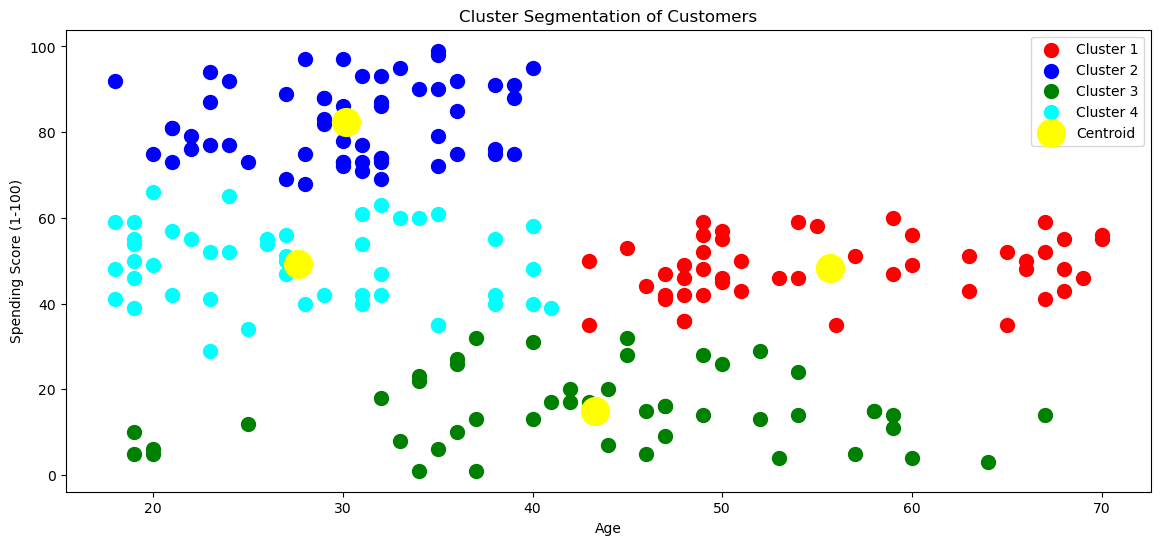

In [6]:
# Inisialisasi model K-Means dengan 4 klaster, dan menggunakan metode inisialisasi 'k-means++'.
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# Melakukan prediksi klaster untuk setiap data.
y_kmeans = kmeans.fit_predict(data)

# Membuat plot untuk visualisasi hasil klaster.
fig, ax = plt.subplots(figsize=(14, 6))

# Menampilkan data yang termasuk dalam tiap klaster dengan warna yang berbeda.
ax.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
ax.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
ax.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Menampilkan titik-titik centroid klaster dengan warna kuning.
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='yellow', label='Centroid')

# Mengatur judul dan label sumbu pada plot.
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Menampilkan legenda pada plot.
plt.legend()

# Menampilkan plot.
plt.show()

In [7]:
# Mengimpor modul io dari pustaka skimage untuk digunakan dalam implementasi model SOM.
from skimage import io

d:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [8]:
def initialize_weights(input_shape, output_shape):
    # Menghasilkan bobot awal secara acak.
    # Input_shape adalah bentuk dari vektor input, dan output_shape adalah bentuk SOM.
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [9]:
def calculate_distance(input_vector, weights):
    # Menghitung jarak Euclidean (norma L2) antara vektor input dan bobot SOM.
    # Fungsi ini mengembalikan matriks jarak.
    return np.linalg.norm(input_vector - weights, axis=2)


In [10]:
def find_winner_unit_in_image(input_vector, weights):
    # Menghitung jarak antara vektor input dan bobot SOM.
    distances = calculate_distance(input_vector, weights)

    # Menemukan indeks unit dengan jarak terkecil, yang merupakan unit pemenang.
    return np.unravel_index(np.argmin(distances), distances.shape)


In [11]:
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    # Menghitung jarak dari setiap unit ke unit pemenang.
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)

    # Menghitung pengaruh (influence) yang dimiliki oleh setiap unit berdasarkan jarak.
    influence = np.exp(-distances / (2 * neighborhood_radius**2))

    # Mengupdate bobot SOM berdasarkan pengaruh, parameter pembelajaran, dan perbedaan antara vektor input dan bobot.
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)


In [12]:
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    # Mendapatkan bentuk input gambar.
    input_shape = image.shape

    # Menentukan bentuk SOM (Self-Organizing Map) sesuai dengan jumlah saluran warna pada gambar.
    som_shape = (10, 10, input_shape[2])  

    # Inisialisasi bobot SOM dengan ukuran yang sesuai.
    weights = initialize_weights(input_shape, som_shape)

    # Melakukan iterasi sebanyak num_epochs (jumlah epoch).
    for epoch in range(num_epochs):
        # Mengupdate parameter pembelajaran dan radius tetangga.
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)

        # Pemrosesan SOM untuk tiap piksel pada gambar.
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)

                # Mengupdate bobot SOM berdasarkan pemenang dan parameter pembelajaran.
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    # Mengembalikan bobot SOM yang telah dilatih.
    return weights


In [13]:
# Mengganti path citra sesuai dengan path citra yang ingin digunakan.
lena_path = "../data/lena.jpg"

# Memuat citra dari path yang telah ditentukan dan melakukan normalisasi intensitas piksel.
lena = io.imread(lena_path) / 255.0

In [14]:
# Jumlah epoch (iterasi) pelatihan SOM.
num_epochs = 100

# Tingkat pembelajaran awal.
initial_learning_rate = 0.1

# Radius tetangga awal.
initial_neighborhood_radius = 5

# Melakukan pelatihan SOM pada citra Lena dengan parameter yang telah ditentukan.
trained_weights = train_som(lena, num_epochs, initial_learning_rate, initial_neighborhood_radius)

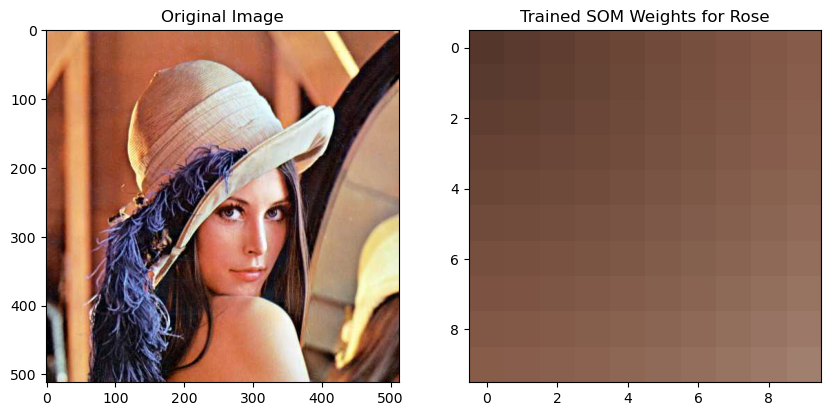

In [15]:
# Membuat gambar berukuran 10x5.
plt.figure(figsize=(10, 5))

# Membagi jendela gambar menjadi dua bagian.
plt.subplot(1, 2, 1)
plt.imshow(lena)
plt.title("Original Image")  # Menampilkan judul untuk gambar asli.

plt.subplot(1, 2, 2)
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Rose')  # Menampilkan judul untuk bobot SOM yang telah dilatih.

# Menampilkan gambar-gambar tersebut.
plt.show()